# kNN k-Nearest Neighbors (Метод k-ближайших соседей)

Применение алгоритма kNN для решения задачи классификации.


### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$. 

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см 
3. ширина лепестка, см 

Метки классов

0. Setosa
1. Versicolour 
2. Virginica

## 0. Импорт библиотек

In [5]:
# программная реализация алгоритма kNN для классификации
from sklearn.neighbors import KNeighborsClassifier
# программная реализация расчета метрики точности
from sklearn.metrics import accuracy_score
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

# модуль, позволяющий подтягивать данные по хрестоматийным примерам для ML
from sklearn import datasets

# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

# библиотеки для работы с матрицами
import pandas as pd
import numpy as np

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке `scikit-learn` модулем `datasets`

In [7]:
iris = datasets.load_iris()

> Что за тип данных `iris`?

In [9]:
# Выведите названия признаков
print(f"Тип данных iris: {type(iris)}")

print("Названия признаков:")
for feature in iris.feature_names:
    print(feature)

Тип данных iris: <class 'sklearn.utils._bunch.Bunch'>
Названия признаков:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [12]:
# Выведите данные по признакам
for i, feature in enumerate(iris.feature_names):
    print(f"Данные по признаку {feature}:")
    print(iris.data[:, i], '\n')


Данные по признаку sepal length (cm):
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9] 

Данные по признаку sepal width (cm):
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3

In [14]:
# Выведите информацию по целевой переменной (классам цветка)
print("Целевая переменная (классы цветка):")
print(iris.target_names)


Целевая переменная (классы цветка):
['setosa' 'versicolor' 'virginica']


In [18]:
# Выведите информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
data_shape = iris.data.shape[0]
target_shape = iris.target.shape[0]
print(f'Размерность признакового пространства {data_shape}')
print(f'Размерность вектора целевой переменной {target_shape}')

Размерность признакового пространства 150
Размерность вектора целевой переменной 150


In [22]:
# Вынесем признаки и целевую перемнную в отдельные переменные
X = iris.data 
y = iris.target

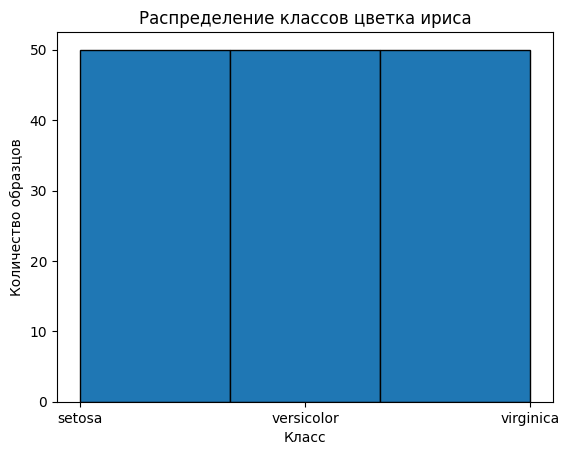

In [23]:
# Посмотрим на гистограмму распределения целевой переменной
# Убедитесь в сбалансированности классов
plt.hist(y, bins=3, edgecolor='black')
plt.title('Распределение классов цветка ириса')
plt.xlabel('Класс')
plt.ylabel('Количество образцов')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

Данные очень хорошо сбалансированы - каждого класса по 50 объектов.

> Выведите гистограммы для всех признаков X

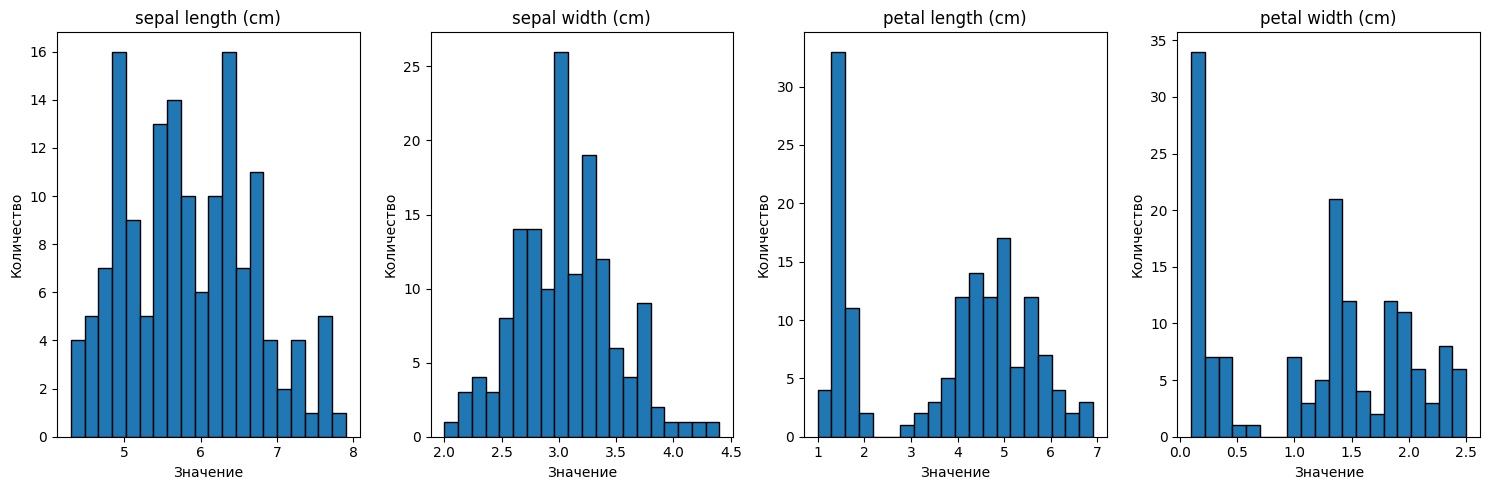

In [24]:
# type your code here
n_features = X.shape[1]

# Строим гистограммы для каждого признака
fig, axes = plt.subplots(1, n_features, figsize=(15, 5))

for i in range(n_features):
    axes[i].hist(X[:, i], bins=20, edgecolor='black')
    axes[i].set_title(iris.feature_names[i])
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Количество')

plt.tight_layout()
plt.show()

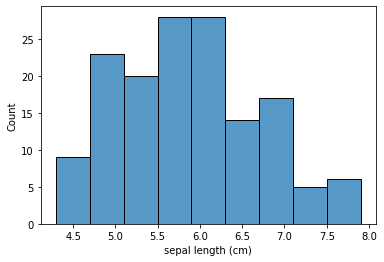

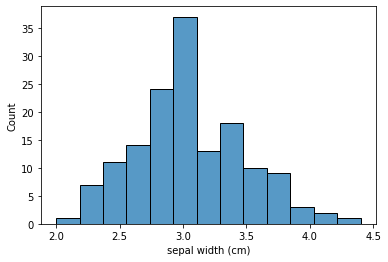

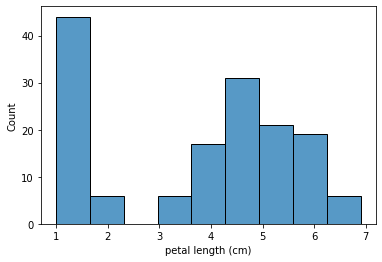

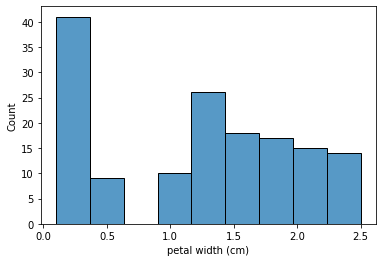

In [10]:
# Пример результата

## 2. Визуально изобразим данные

Для отображения в двумерном пространстве выберем параметры `длина чашелистика, см` и `длина лепестка, см`

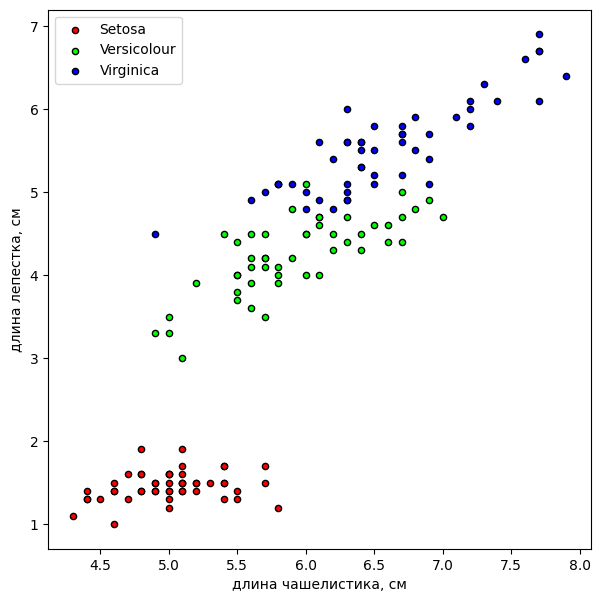

In [25]:
# список цветов для визуализации
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

# создадим полотно
fig, ax = plt.subplots(figsize=(7,7))
# отрисуем экземпляры 
for i, iris_class in enumerate(['Setosa', 'Versicolour', 'Virginica']):
    idx = y==i
    ax.scatter(X[idx,0], X[idx,2], 
               c=cmap_bold.colors[i], edgecolor='k', 
               s=20, label=iris_class);

ax.set(xlabel='длина чашелистика, см', ylabel='длина лепестка, см')
ax.legend();

> Создайте переменную `iris_df`, которая будет представлять собой DataFrame из всех X и целевой переменной

In [58]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['class'] = iris.target_names[y]

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target   class  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


> При помощи `sns.pairplot` выведите диаграммы рассеивания для всех попарных комбинаций признаков

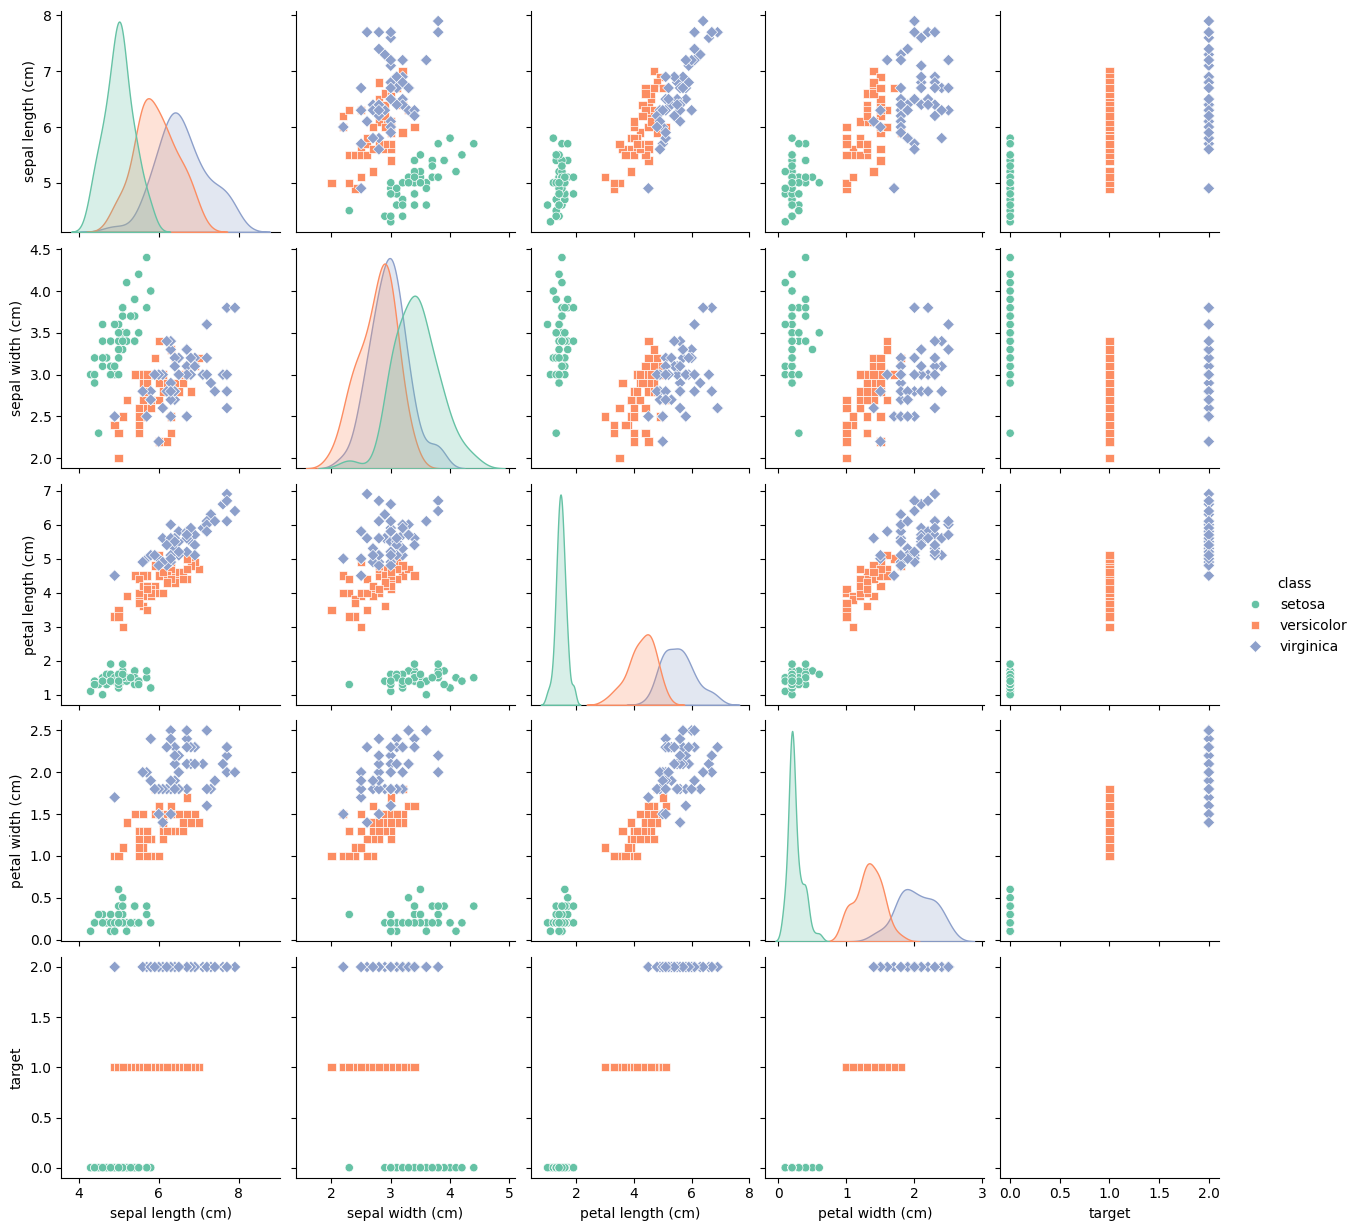

In [61]:
# type your code here
sns.pairplot(iris_df, hue='class', palette='Set2', markers=["o", "s", "D"], height=2.5)
plt.show()

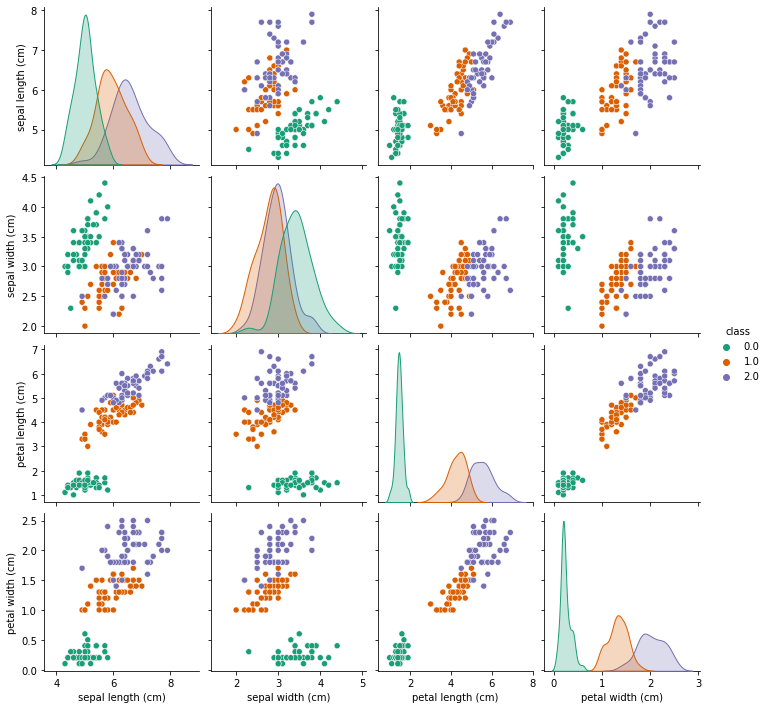

In [13]:
# что должно получиться на выходе

### Посмотрим на `plotly.express`

In [60]:
px.histogram(data_frame=iris_df,x='sepal length (cm)',color='class')

In [32]:
df = px.data.iris()
fig = px.scatter(df, x=df.sepal_length, y=df.sepal_width, color=df.species, size=df.petal_length)
fig.show()

# 3. Обучение модели

Теперь давайте попробуем обучить модель, которая будет на основании параметров цветка, определять к какому сорту относится этот цветок.

## 3.1. Обучение на всех данных

In [62]:
# Создадим объект класса KNN с параметром n_neighbors=3
classifier_kNN = KNeighborsClassifier(n_neighbors=3)

# Обучение модели
classifier_kNN.fit(X, y)

# Прогноз
y_pred = classifier_kNN.predict(X)

In [63]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(y, y_pred)*100
print('Точность модели равна на всей выборке ' + str(round(accuracy, 2)) + ' %.')

Точность модели равна на всей выборке 96.0 %.


## 3.2. Разбиение выборки на train и test

Если мы будем оценивать качество модели на тех же данных, на которых обучали модель, как в примере выше, то будет происходить процесс заучивания ответов, а не поиска закономерностей в данных. В таком случае, модель не будет обладать обобщающей способностью и когда на вход прилетят новые данные, точность подобного прогноза будет сильно ниже, чем на данных, на которых модель обучалась.

В машинном обучении принято разделять данные на обучающую (**training set**) и тестовую (**test set**) выборки с тем, чтобы повысить обобщающую способность модели, т.е. способность делать прогнозы на данных, которые не участвовали при обучении.

Некоторым стандартом принято использовать разбиение 80 на 20, где 80% - размер обучающей выборки, 20% - размер тестовой выборки. Это не прибитые гвоздем значения, в зависимости от задачи они конечно могут меняться, но если нет никаких вводных по размерам этих групп, в первом приближении можно брать такое разбиение.

При разбиении важно учесть, чтобы и в тестовой и в обучающей выборках данные были распределены корректно. Стратификацию можно реализовать самостоятельно, но более оптимальным решением является использование готовой библиотеки `scikit-learn` и конкретно модулем `train_test_split`.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

> # Задание 1
>
> При помощи функции `mean()` посчитайте среднее значение для параметра **sepal length (cm)** (первый столбец в X) и введите в  поле ответа модуль разности между значениями для X_train и X_test (округлите до второго знака).

In [65]:
# type your code here
sepal_length_train_mean = np.mean(X_train[:, 0])
sepal_length_test_mean = np.mean(X_test[:, 0])
difference = abs(sepal_length_train_mean - sepal_length_test_mean)
print('Модуль разности между значениями для X_train и X_test:', round(difference, 2))

Модуль разности между значениями для X_train и X_test: 0.12


А теперь приступим к обучению модели на новом разбиении данных

In [66]:
# Создадим объект класса KNN с параметром n_neighbors=5
classifier_kNN_robust = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающей выборке
classifier_kNN_robust.fit(X_train, y_train)

# Прогноз на тестовых данных
y_pred = classifier_kNN_robust.predict(X_test)

In [67]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(y_test, y_pred)*100
print('Точность модели на тестовой выборке равна ' + str(round(accuracy, 2)) + ' %.')

Точность модели на тестовой выборке равна 96.67 %.


> # Задание 2
>
> Найдите оптимальное количество соседей для алгоритма в диапазоне [2;40]. Если для каких-то значений параметра `n_neighbours` будет одинаковая метрика accuracy, предпочтительнее брать модель с меньшим параметром. Ответ занесите в форму.

In [68]:

n_neighbours = range(2, 41)
acc_list = []

for n_n in n_neighbours:
    knn = KNeighborsClassifier(n_neighbors=n_n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)

In [69]:
best_k = n_neighbours[acc_list.index(max(acc_list))]

print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


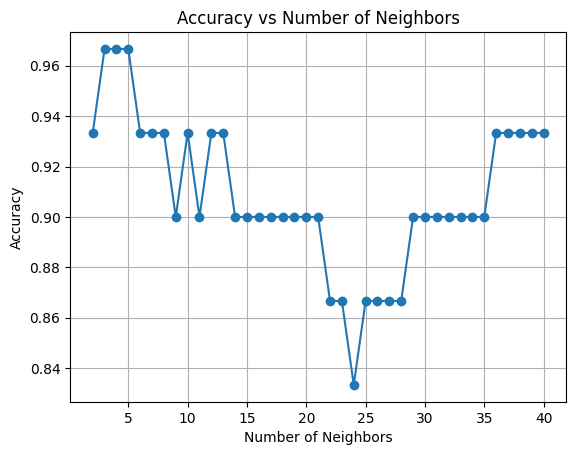

In [71]:
# plot acc_list
plt.plot(n_neighbours, acc_list, marker='o')
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()